Filters
=======
The [filters](api/ktk.filters.rst) module wraps some filters to use directly with ktk's TimeSeries objects. These filters are convenience wrappers for scipy's filters.

In [1]:
import ktk
import numpy as np
import matplotlib.pyplot as plt

ktk.lab()

Smoothing and derivating a TimeSeries with a Savitzky-Golay Filter
------------------------------------------------------------------
This filter applies the `scipy.signal.savgol_filter` filter to a TimeSeries. To see it in effect, let's define a TimeSeries with some dummy data.

In [2]:
time = np.linspace(0, 1, 100)

tsin = ktk.TimeSeries(time=time)
tsin.data['data1'] = np.sin(time * 2 * np.pi)
tsin.data['data2'] = time**2

To smooth the TimeSeries' data:

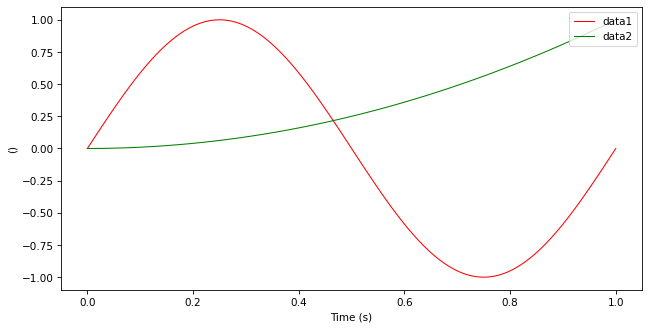

In [3]:
y = ktk.filters.savgol(tsin,
                       window_length=3,
                       poly_order=2,
                       deriv=0)
y.plot()

To calculate the first derivative of the TimeSeries' data:

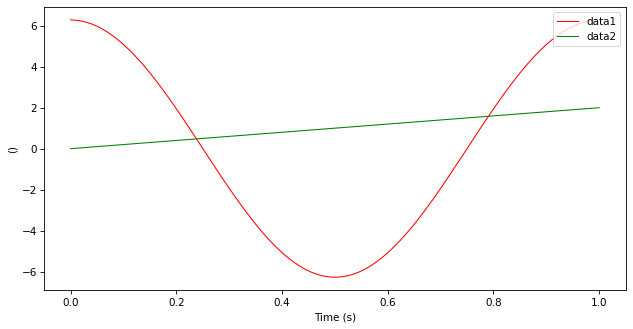

In [4]:
doty = ktk.filters.savgol(tsin,
                          window_length=3,
                          poly_order=2,
                          deriv=1)
doty.plot()

To calculate the second derivative of the TimeSeries' data:

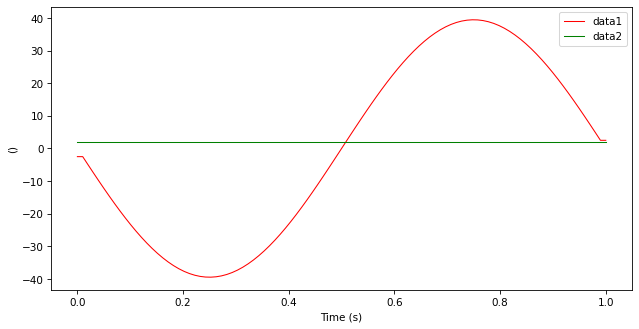

In [5]:
ddoty = ktk.filters.savgol(tsin,
                           window_length=3,
                           poly_order=2,
                           deriv=2)
ddoty.plot()

And so on.

We can also smooth a signal with the smoothing filter `smooth`, which is a convenience function that smooths a TimeSeries using a moving average of N samples. It calls the Savitzky-Golay filter with a polynom order of 0. For example, let's define a TimeSeries with some random data inside:

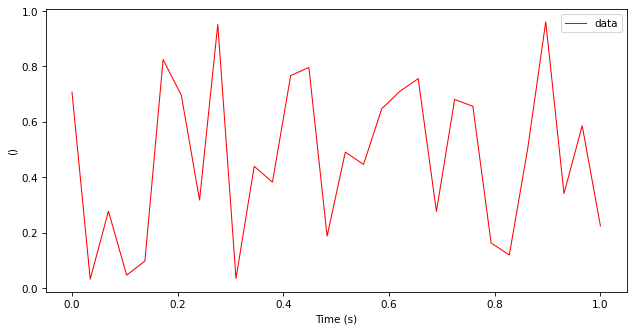

In [6]:
data = np.array(
        [0.7060, 0.0318, 0.2769, 0.0462, 0.0971, 0.8235, 0.6948,
         0.3171, 0.9502, 0.0344, 0.4387, 0.3816, 0.7655, 0.7952,
         0.1869, 0.4898, 0.4456, 0.6463, 0.7094, 0.7547, 0.2760,
         0.6797, 0.6551, 0.1626, 0.1190, 0.4984, 0.9597, 0.3404,
         0.5853, 0.2238])

ts = ktk.TimeSeries()
ts.data['data'] = data
ts.time = np.linspace(0, 1, data.shape[0])

ts.plot()

To smooth this function using a moving average on 5 samples:

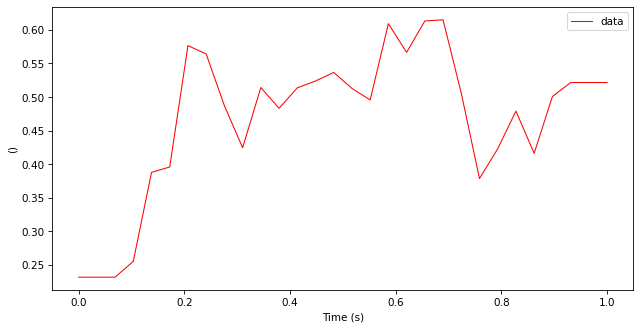

In [7]:
y = ktk.filters.smooth(ts, 5)

y.plot()

Butterworth filter
------------------
The `butter` method applies a butterworth filter on a TimeSeries, using `scipy.signal`'s functions.

Let's define a TimeSeries with a sinusoidal signal at 1 Hz, with an amplitude of 1:

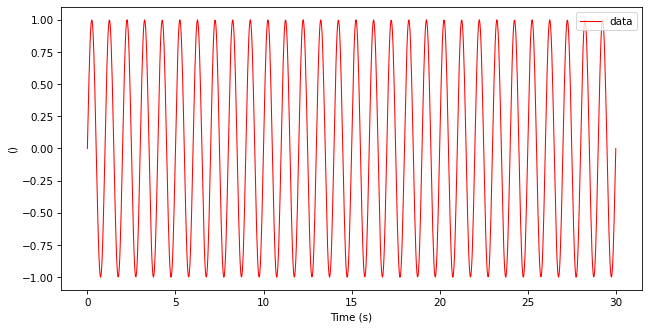

In [8]:
ts = ktk.TimeSeries(time=np.linspace(0, 30, 1000))
ts.data['data'] = np.sin(2 * np.pi * ts.time)

ts.plot()

To filter at 1 Hz, with an order 1:

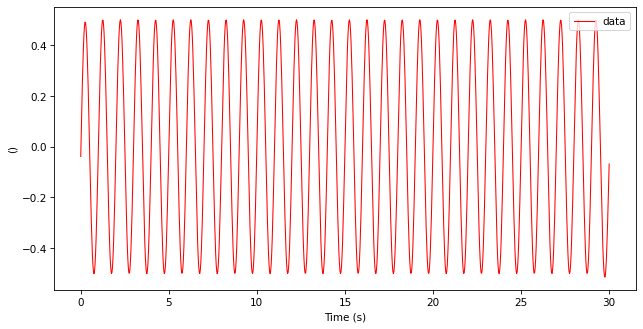

In [9]:
new_ts = ktk.filters.butter(ts, 1, order=1, btype='low')

new_ts.plot()

For more information on filters, please check the [API Reference](api/ktk.filters.rst).